In [2]:
# 量子テレポーテーションを構築するためのソースコード
# 必要なライブラリをインポートする
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

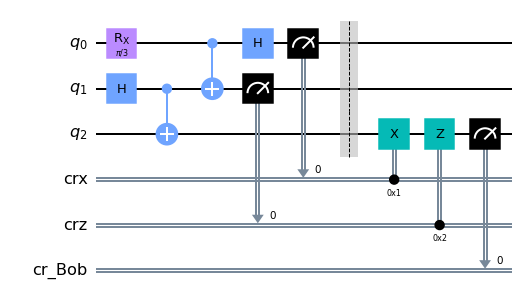

In [7]:
# 1つの量子レジスタと3つの古典レジスタを別々に用意する。
q = QuantumRegister(3, name="q")
crx = ClassicalRegister(1, name="crx")
crz = ClassicalRegister(1, name="crz")
cr_Bob = ClassicalRegister(1, name="cr_Bob")
qc = QuantumCircuit(q, crx, crz, cr_Bob)

# アリスが送信したい量子ビットの状態を用意する
qc.rx(pi / 3, 0)
# アリスとボブが共有しているもつれ量子ビット対を用意する
qc.h(1)
qc.cx(1, 2)
# アリスが送信したい量子ビットと自分のもつ量子ビットを相互作用させる
qc.cx(0, 1)
qc.h(0)
# アリスのもつ量子ビットを測定する。
qc.measure(0, crx)
qc.measure(1, crz)
qc.barrier()

# アリスから送られた測定結果より、ボブの操作内容を決定する関数
def decode_Bob (qc) :
    qc.x(2).c_if(crx, 1)
    qc.z(2).c_if(crz, 2)

# ボブの量子ビットを操作する
decode_Bob (qc)
# 測定する。
qc.measure(2, cr_Bob)
# 量子回路を描画する
qc.draw('mpl')

In [8]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
# ジョブを実行する
job = execute(qc, backend=backend, shots=1024)
cal_results=job.result()

{'0 1 1': 188, '1 1 1': 61, '1 0 1': 217, '0 0 0': 186, '0 1 0': 59, '0 0 1': 59, '1 0 0': 65, '1 1 0': 189}


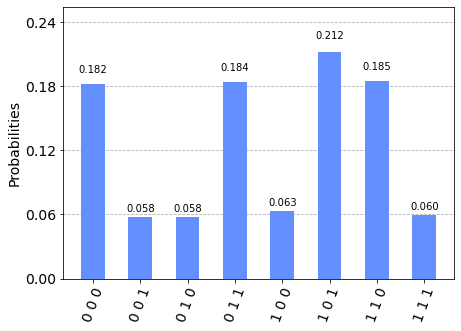

In [9]:
# 結果を取得して描画&プロットする。
answer = cal_results.get_counts()
print(answer)
plot_histogram(answer)

In [10]:
count_zero = 0
count_one = 0
keys = list(answer.keys())
# 0と1の回数をそれぞれカウントする。
for key in keys :
    if key[0] == '0' :
        count_zero += answer[key]
    else :
        count_one += answer[key]


In [11]:
# 結果を出力する
print("probability of |0>:{: .3f}".format(count_zero / 1024))
print("probability of |1>:{: .3f}".format(count_one / 1024))

probability of |0>: 0.480
probability of |1>: 0.520
